## CSV to `GeoDataFrame`

Let's start with importing packages and updating viewing options:

In [2]:
import os
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

In [48]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Simpify column names
power_plants.columns = power_plants.columns.str.lower()

# Drop first column
power_plants = power_plants.drop(columns='unnamed: 0')

power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,...,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,...,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,...,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


In [49]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)
points

# Create a geodataframe
power_plants = gpd.GeoDataFrame(power_plants,
                                geometry = points,
                                crs = 'EPSG: 4269')

power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,...,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,...,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,...,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,...,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)


<Axes: >

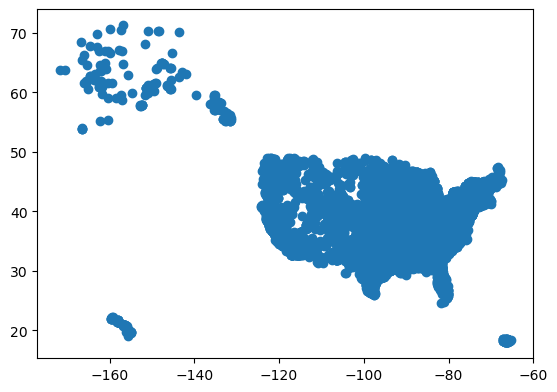

In [5]:
power_plants.plot()

## f-strings

So far, we have printed ariables using string concatenation inside the `print()` function: we use commas to separate every variable and string that we want to print. Example:

In [6]:
print('CRS', power_plants.crs)

CRS EPSG: 4269


Another popular way to mix variables and strings in a print statement is by creating a **f-string**, stand for "formatted string."

The simplest syntax:
```python
f"some text {replace}"
```

where `replace` can be a variable, na expression, a functionn or method call.
Example:

In [8]:
# Check what is the ellipsoid
f"ellipsoid: {power_plants.crs.ellipsoid}"

'ellipsoid: GRS 1980'

In [9]:
# Use f-strings inside the print function
print(f"datum: {power_plants.crs.datum}")

datum: North American Datum 1983


Advantages of using f-strings: a lot of customization for formatting output.

In [12]:
print(f"{'Is the CRS geographic?: ':<25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS geographic?: ':<25} {power_plants.crs.is_projected}")

Is the CRS geographic?:   True
Is the CRS geographic?:   False


# Import shapefile

In [13]:
os.getcwd()

'/Users/choyt/MEDS/eds220-env-data/eds220-2024-in-class'

In [17]:
# Create absolute file path to data
fp = os.path.join('/',
                  'courses', 
                  'EDS220', 
                  'data',
                 'tl_2022_us_state',
                 'tl_2022_us_state.shp')

states = gpd.read_file(fp)

# Simplify column names
states.columns = states.columns.str.lower()

states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


EPSG:4269


<Axes: >

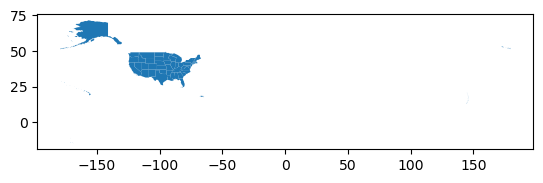

In [18]:
print(states.crs)
states.plot()

`for` loops

It can be easier to work with the codes as numbers instead of strings, let's update the corresponding columns in the geo-dataframe:
`region`, `division`, `statefp`

First thing, check if these are columns with strings:

In [20]:
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"division is string dtype? {is_string_dtype(states['division'])}")
print(f"statefp is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


This is inconvenient because it repeats the same piece of code, only changing the column name.
Instead, using a `for` loop allows to succintly print the same info:

In [22]:
code_cols = ['region', 'division', 'statefp']

# Check whether codes columns are strings
for column in code_cols:
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


`for` loops execute a block of code a fixed number of times, iterating over a set of objects. In this case, we iterate over the list of column names. 

**DRY code**

DRY = don't repeat yourself is a core programming principle that encourages reducing redundancy and consolidating repeated logic.
If you need to repeat the "same" code more than twice, you probably need a `for` loop.

Next, update the data type of the columns to be integers.
This time, we will verify the data type of the column using the `is_numeric_dtype()` and `assert` statement:

In [23]:
# Update code columns into integers
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column]) # Check conversion

The `assert` keyword does nothing if the expression next to it evaluates to `True`.
If the expression evaluates to `False` then `assert` raises an `AssertionError` and stops your code from running.
Example:

In [25]:
# Does nothing if statement is True
assert 2 + 2 == 4

In [28]:
# Raises an error if the statement is False
assert 2 + 2 == 3

AssertionError: 

## Data selection

For this lesson, we want to use only the contiguous states. The `states` geo-dataframe covers a bigger extension.

<Axes: >

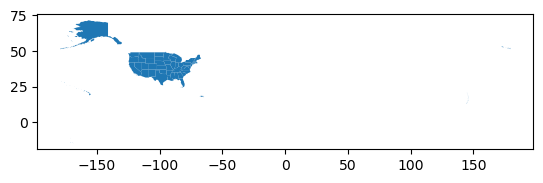

In [29]:
states.plot()

## Check-in

- What are the unique values for region, division, or state codes in the data?
- Which codes should we select to keep only states in the contiguous US?

In [34]:
for column in code_cols:
    print(f" the unique values for {column} include: {states[column].unique()}")

 the unique values for region include: [3 2 1 4 9]
 the unique values for division include: [5 3 4 1 8 9 2 7 6 0]
 the unique values for statefp include: [54 12 17 27 24 44 16 33 37 50  9 10 35  6 34 55 41 31 42 53 22 13  1 49
 39 48  8 45 40 47 56 15 38 21 78 69 66 23 36 32  2 60 26  5 28 29 30 20
 18 72 46 25 51 11 19  4]


Region codes 1,2,3,4 are the contiguous US.
Hawaii and Alaska have codes 2, 15 and then region 9 should also be excluded.

<Axes: >

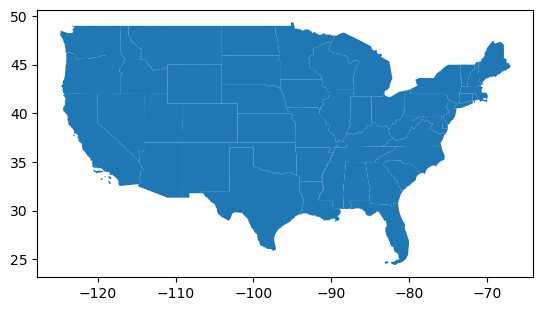

In [44]:
# Select contiguous US states
contiguous = states[(states.region != 9) & (~states.statefp.isin([2,15]))]
contiguous.plot()

The `~` is used in Python to negate a statement.

Select the data in the `power_plants` data frame for the contiguous US states.

In [50]:
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]

In [51]:
power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,...,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,...,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,...,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,...,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,...,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)
5,11575,10,Greene County,195,Alabama Power Co,Electric Utility,Highway 43,Demopolis,Greene,Alabama,...,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.781100,32.601700,POINT (-87.78110 32.60170)


## Plotting

Before we plot our data, let's make sure they are in the same CRS:

In [52]:
contiguous.crs == power_plants.crs

True

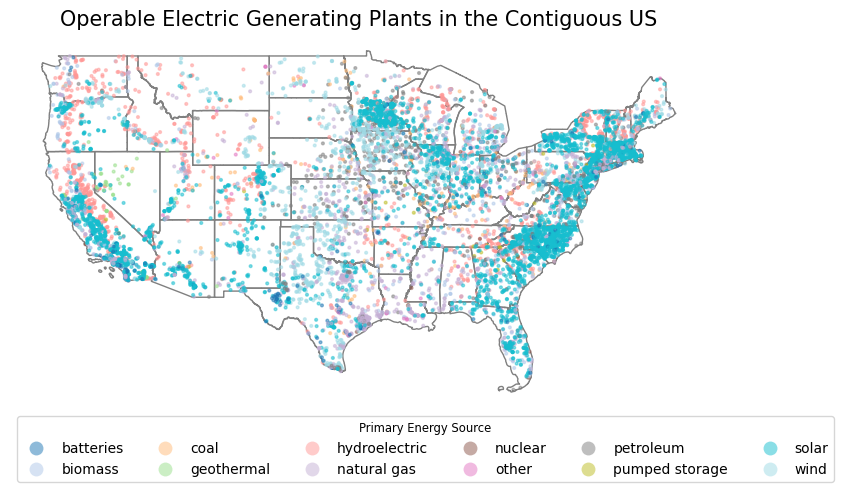

In [60]:
fig, ax = plt.subplots(figsize = (9,5)) # in inches

# Remove axis for a cleaner map
ax.axis('off')

ax.set_title('Operable Electric Generating Plants in the Contiguous US', fontsize = 15)

contiguous.plot(ax = ax,
               color = 'none',
               edgecolor = 'gray')

# Add electric color power plants colored by energy source
power_plants.plot(ax = ax,
                 column = "primsource", # color by values in ths column
                 legend = True,
                 markersize = 4,
                 cmap = 'tab20', # color scheme
                 alpha = 0.5,
                  legend_kwds = {
                      'title': 'Primary Energy Source',
                      'title_fontsize' : 'small',
                      'ncol' : 6,
                      'loc' : 'upper left',
                      'bbox_to_anchor' : (0,0)
                  }
                 )

plt.show()

We controlled the legend location using `loc` and `bbox_to_anchor` in the `legend_kwds`:
 - `loc` indicates **the corner of the legend that we want to use for placement**,
 - `bbox_to_anchor` is a tuple with coordinates indicating where to place the corner specified in `loc` relative to the axes. Values between 0 and 1 are *inside* the axes.
